In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the dataset
df= pd.read_csv(r"C:\Users\LENOVO\Downloads\avocado.csv.zip")

In [3]:
# Print the dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# print the size of dataset
df.shape

(18249, 14)

As we see have 18249 rows and 14 columns in our dataset

In [5]:
# lets check null values in our dataset
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
df.isnull().values.any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


As we see there is no null value in our dataset and also there is some object type data is available in our dataset

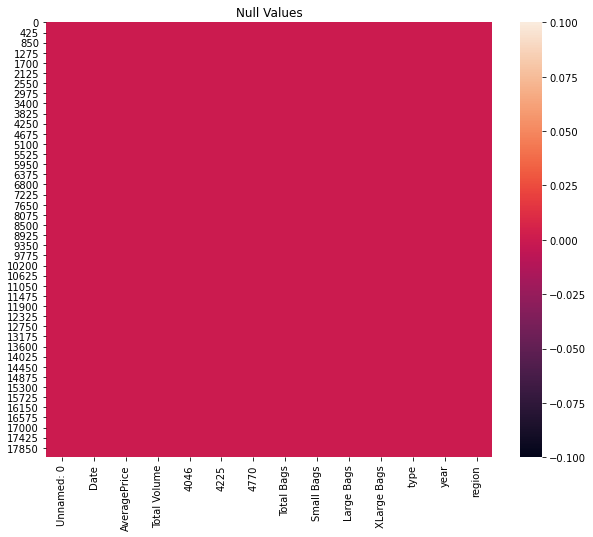

In [8]:
# lets visualize the null value
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [9]:
#Checking description of dataset
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
# remove column unnamed becuase its just an index
df= df.drop('Unnamed: 0', axis=1)

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

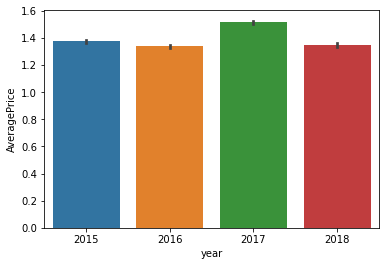

In [13]:
# checking ratio of year and price that which year had max average price
sns.barplot(x='year', y='AveragePrice', data=df)

As we see year 2017 having max averageprice

In [18]:
#Earlier in info we have seen that Date is Object type not the date type. We have to change its type to date type.
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)


In [22]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [24]:
# As we are haveing differennt column for month day and year, so we can remove date column
df= df.drop('Date', axis=1)

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

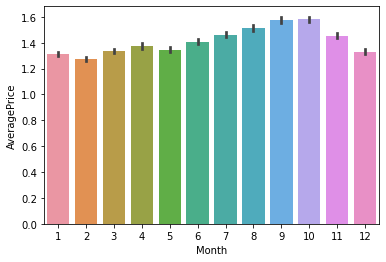

In [21]:
# checking ratio of month and price that which year had max average price
sns.barplot(x='Month', y='AveragePrice', data=df)

September and October are the month where max no of average price is there, but the thing is almost for whole year the price is almost same for the avocado 

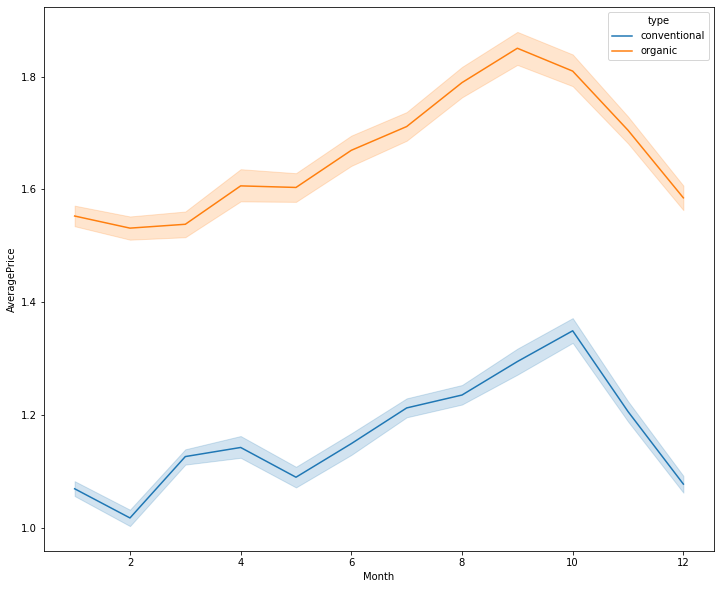

In [26]:
plt.figure(figsize=(12,10))
sns.lineplot(x='Month', y='AveragePrice', hue='type', data=df)
plt.show()

There is hike between month 8–10 of both type of avocado both for conventional and organic type of avocado.
Also, the conventional type of avocado is varying in term of price as seen in line plot because in starting the price is high but then it get decrease and so on.

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

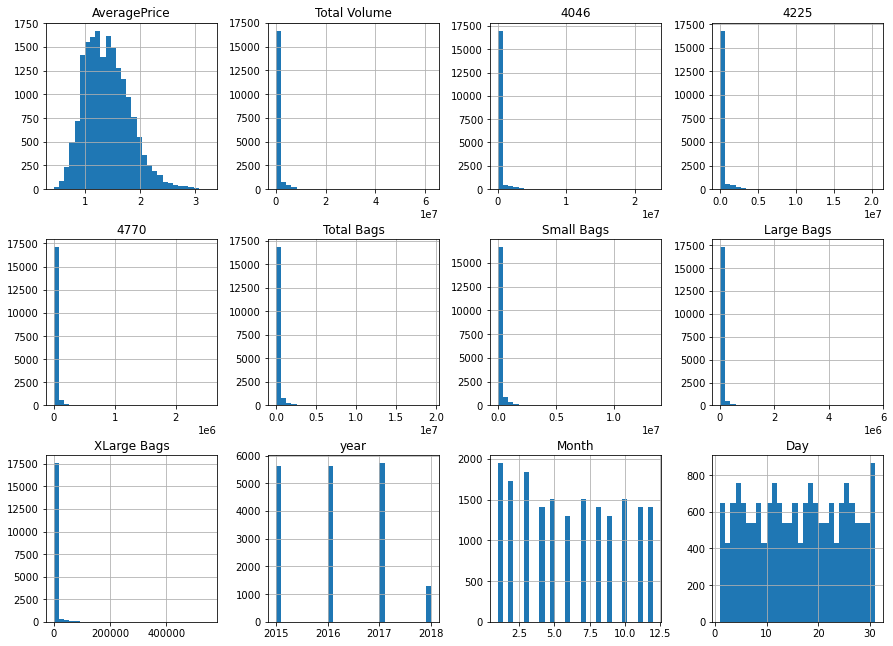

In [28]:
import warnings 
warnings.filterwarnings('ignore')
df.hist(figsize=(15,15), grid= True, layout=(4,4), bins=30)

Average price column is normally distributing over the histogram.
Rest of the data are not much varying in term of numbers, so they are almost left skewed data
To make the column as normal distributed we can use different methods, but I am using numPy log to make the skew values as normal distributed.

In [29]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

In [30]:
# use numpylog for removing skewness
skew= ('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]= np.log1p(df[col])

In [31]:
#lets check the skewness now
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

## transfrom non numerical column into numrecal column

In [32]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype== np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])    

In [36]:
df.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,3,53,1,3
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,3,53,0,27
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,3,53,0,20
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,3,53,0,13
18248,1.62,9.769418,7.971006,7.765200,5.418453,9.393924,9.391757,3.296207,0.0,1,3,53,0,6


In [41]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
Day               int64
dtype: object

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
type            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
region          AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Month            AxesSubplot(0.44569,0.321957;0.133621x0.16413)
Day             AxesSubplot(0.606034,0.321957;0.133621x0.16413)
dtype: object

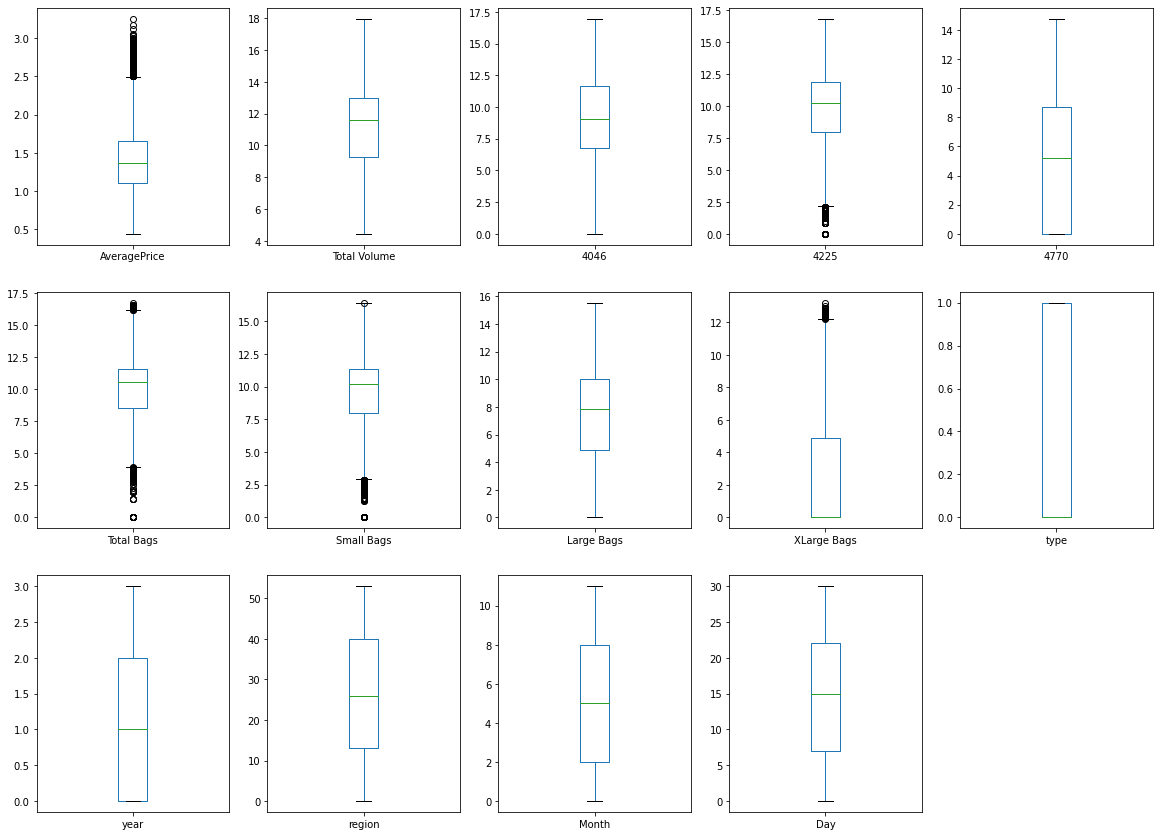

In [43]:
# lets check for outliers
df.plot(kind='box', subplots= True, layout=(4,5), figsize=(20,20))

## As we see there are outliers in our dataset so we need to remove outliers

In [54]:
features = df[['4225','Total Bags','Small Bags','XLarge Bags']]

In [55]:
# calculate the Z score
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,0,11,26
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,0,11,19
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,0,11,12
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,0,11,5
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,0,10,28


In [56]:
#Checking shape of new dataset
df_new.shape

(17954, 14)

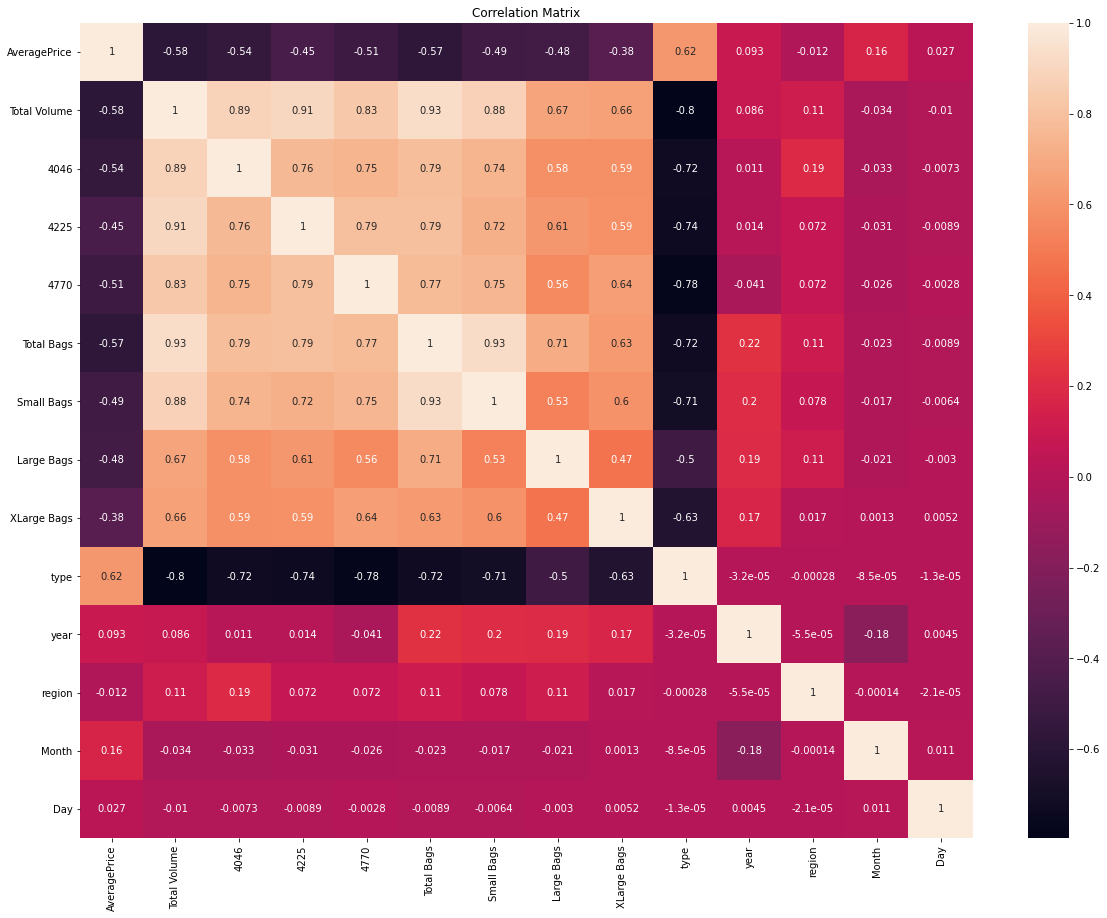

In [58]:
# Checking the correlation
plt.figure(figsize = [20, 15])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

### Split data into X and Y

### Prediction with Average Price

In [75]:
x= df.drop('AveragePrice')
y = df['AveragePrice']

In [78]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=90)

In [79]:
x_train.shape

(12774, 13)

In [80]:
x_test.shape

(5475, 13)

In [81]:
y_train.shape

(12774,)

In [82]:
y_test.shape

(5475,)

# Model Building

In [83]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [84]:
model = [DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for i in model:
    i.fit(x_train,y_train)
    pre = i.predict(x_test)
    r2_sc = r2_score(y_test,pre)
    if r2_sc>max_r2_score:
        max_r2_score=r2_sc
        final_model=i
print("max r2 score is: ", max_r2_score,"final model is: ",final_model)

max r2 score is:  0.747864638851997 final model is:  DecisionTreeRegressor()


In [87]:
DT= DecisionTreeRegressor()
parameters = {'max_depth': [int(x) for x in np.linspace(1, 32, 32, endpoint=True)]}
DT_regressor = GridSearchCV(DT, parameters)
DT_regressor.fit(x_train, y_train)
print(DT_regressor.best_params_)

{'max_depth': 13}


In [96]:
DT= DecisionTreeRegressor(max_depth=14)
DT.fit(x_train, y_train)
y_pred= DT.predict(x_test)

In [99]:
r2_score(y_test,y_pred)

0.7617040061188313

In [100]:
print('mae:',mean_squared_error(y_pred,y_test))
print('mae:',mean_absolute_error(y_pred,y_test))
print('rmse:',np.sqrt(mean_squared_error(y_pred,y_test)))

mae: 0.03904192017500012
mae: 0.13197412475733092
rmse: 0.1975902836047363


### saving the model

In [101]:
import pickle

In [102]:
filename= 'Avocado average price prediction'
pickle.dump(DT, open(filename,'wb'))

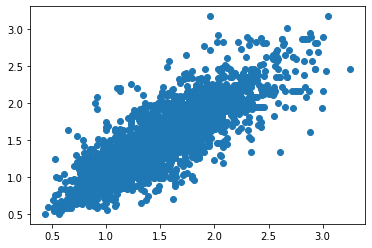

In [103]:
# plot thr graph between actual and predicted valur
plt.scatter(x=y_test, y=y_pred)

# Prediction with Region

In [104]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import MultinomialNB

In [117]:
xc =df.drop('region', axis=1)
yc= df['region']

In [118]:
# lets standarized out data
sc= StandardScaler()
sc.fit_transform(xc)
xc = pd.DataFrame(xc, columns= xc.columns)

### Model buiding for classification problem

In [122]:
models = [DecisionTreeClassifier(), KNeighborsClassifier()]  
max_accuracy_score =0
for r_state in range(40,90):
    xc_train,xc_test,yc_train,yc_test= train_test_split(xc,yc, test_size=0.33, random_state=r_state)
    for i_c in models:
        i_c.fit(xc_train,yc_train)
        pre_c= i_c.predict(xc_test)
        ac_score= accuracy_score(yc_test,pre_c)
        print('Accuracy score correspond to random state', r_state, 'is',ac_score)
        if ac_score>max_accuracy_score:
            max_accuracy_score=ac_score
            final_state= r_state
            final_model_c=i_c            
print('max accuracy correspond to random state',final_state,'is',max_accuracy_score,'and the best model is',final_model_c) 

Accuracy score correspond to random state 40 is 0.7853229287730367
Accuracy score correspond to random state 40 is 0.3692512037190769
Accuracy score correspond to random state 41 is 0.7811721733355471
Accuracy score correspond to random state 41 is 0.37323592893906693
Accuracy score correspond to random state 42 is 0.7854889589905363
Accuracy score correspond to random state 42 is 0.3700813548065748
Accuracy score correspond to random state 43 is 0.7790137805080525
Accuracy score correspond to random state 43 is 0.36958326415407605
Accuracy score correspond to random state 44 is 0.7768553876805578
Accuracy score correspond to random state 44 is 0.3647683878465881
Accuracy score correspond to random state 45 is 0.7891416237755271
Accuracy score correspond to random state 45 is 0.3627760252365931
Accuracy score correspond to random state 46 is 0.7854889589905363
Accuracy score correspond to random state 46 is 0.3665947202390835
Accuracy score correspond to random state 47 is 0.7879794122

In [126]:
xc_train,xc_test,yc_train,yc_test= train_test_split(xc,yc, test_size=0.33, random_state=54)
DT2= DecisionTreeClassifier()
parameters = {'criterion': ['gini','entropy'], 'max_depth': [int(x) for x in np.linspace(1, 32, 32, endpoint=True)]}
DT_Classifier = GridSearchCV(DT2, parameters)
DT_Classifier.fit(xc_train, yc_train)
print(DT_Classifier.best_params_)

{'criterion': 'entropy', 'max_depth': 23}


In [128]:
DT2= DecisionTreeClassifier(criterion= 'entropy', max_depth=23)
DT2.fit(xc_train,yc_train)
DT_pred= DT2.predict(xc_test)
accuracy_score(yc_test,DT_pred)

0.7896397144280259

In [129]:
# we can try to impriove accracy by changing parameters

In [138]:
DT2= DecisionTreeClassifier(criterion= 'entropy', max_depth=60)
DT2.fit(xc_train,yc_train)
DT_pred= DT2.predict(xc_test)
accuracy_score(yc_test,DT_pred)

0.7919641374730201

#### I have tried but default parameter giving highest accuracy

In [139]:
filename= 'Region wise prediction'
pickle.dump(DecisionTreeClassifier, open(filename,'wb'))